<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
- Proses algoritma KNN adalah melakukan perhitungan jarak euclidian pada sebuah data test ke data feature. Lalu mengkelaskan data tersebut berdasarkan banyak data yang lebih dekat kepada data test.
- KNN sulit berkerja jika data yang kita miliki mempunyai banyak pencilan dan sulit melakukan klasifikasi jika hyperparamter K nya genap.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], 
                        wine['target']], 
                  columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def uniform():
    u_score = []
    for i in range(19):
        knn_weight = KNeighborsClassifier(n_neighbors=i+2, weights='uniform')
        knn_weight.fit(X_train, y_train)
        y_predict = knn_weight.predict(X_test)
        u_score.append(accuracy_score(y_test, y_predict))
    return u_score


In [ ]:
def distance():
    d_score = []
    for i in range(19):
        knn_distance = KNeighborsClassifier(n_neighbors=i+2, weights='distance')
        knn_distance.fit(X_train, y_train)
        y_predict = knn_distance.predict(X_test)
        d_score.append(accuracy_score(y_test, y_predict))
    return d_score

Uniform Scores: 
 [0.8333333333333334, 0.7777777777777778, 0.75, 0.75, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.8611111111111112, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7777777777777778, 0.7222222222222222, 0.7777777777777778, 0.7777777777777778, 0.7222222222222222, 0.75, 0.75, 0.75]

Distance Scores: 
 [0.8611111111111112, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.8055555555555556, 0.8333333333333334, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.75, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778]


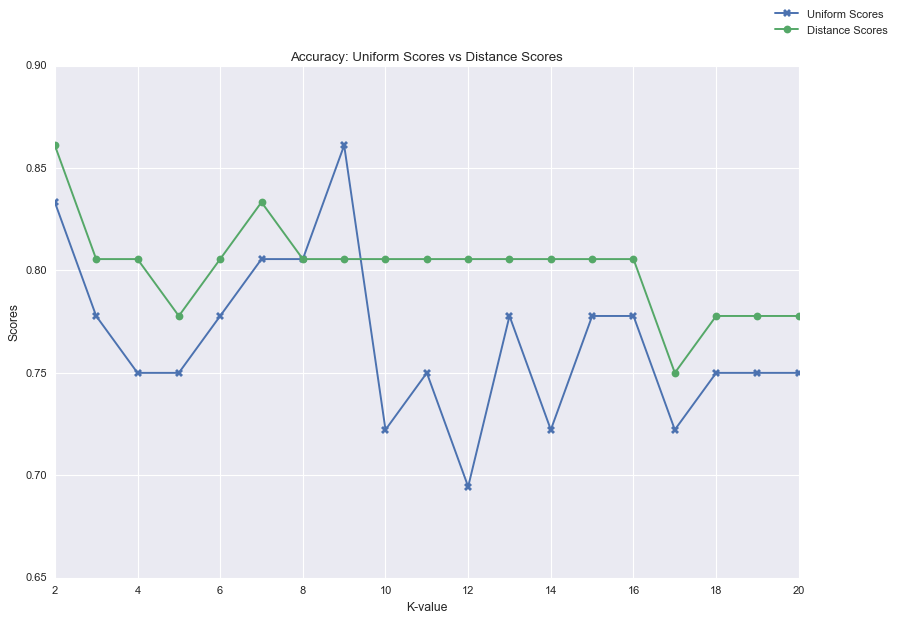

In [ ]:
print('Uniform Scores: \n', uniform())
print('\nDistance Scores: \n', distance())

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([i+2 for i in range(19)], uniform(), marker='X', label='Uniform Scores')
ax.plot([i+2 for i in range(19)], distance(), marker='o', label='Distance Scores')
ax.set_xlabel('K-value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy: Uniform Scores vs Distance Scores')
fig.legend()
plt.style.use('seaborn')
plt.show()

---

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [ ]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression(fit_intercept=True)
reg.fit(X,y)
y_predict = reg.predict(X)

In [ ]:
reg.coef_

array([-0.11700384,  0.03017099, -0.14855216,  0.03985434, -0.00048977,
        0.14432013, -0.37239141, -0.30347431,  0.03935653,  0.07562387,
       -0.14924506, -0.2700542 , -0.00070114])

In [ ]:
reg.intercept_

3.473285305797763